In [348]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

- Tratamiento de los dos data que hablan sobre movimientos de los usuarios

In [349]:
df1 = pd.read_csv('CSV/df_final_web_data_pt_1.txt')

In [350]:
df2 = pd.read_csv('CSV/df_final_web_data_pt_2.txt')

In [351]:
df1.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')

In [352]:
df2.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')

- Tratamiento del demo final 

In [353]:
df_web_data = pd.concat([df1, df2], axis=0)

In [354]:
demo = pd.read_csv("CSV/df_final_demo.txt", low_memory=False)

In [355]:
demo.isnull().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [356]:
demo = demo.fillna('Unknown')

In [357]:
demo.isnull().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [358]:
frequency_gendr = demo['gendr'].value_counts()
frequency_gendr

gendr
U          24122
M          23724
F          22746
Unknown       14
X              3
Name: count, dtype: int64

In [359]:
frequency_table2 = demo['gendr'].value_counts(normalize=True).head(3)

In [360]:
demo['clnt_age'] = pd.to_numeric(demo['clnt_age'], errors='coerce')


In [361]:
demo_filtrado = demo[demo['clnt_age'].between(20, 80)]

In [362]:
demo_filtrado.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

<Axes: xlabel='clnt_age', ylabel='Count'>

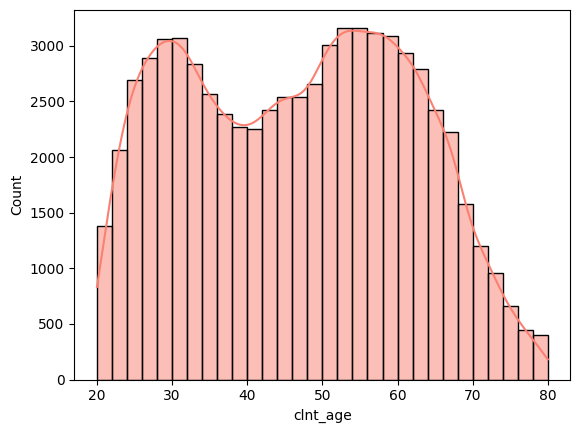

In [363]:
sns.histplot(demo_filtrado['clnt_age'], kde=True, bins=30, color="salmon")

In [364]:
demo_filtrado['bal'] = pd.to_numeric(demo_filtrado['bal'], errors='coerce')


C:\Users\CeX-Laguna\AppData\Local\Temp\ipykernel_20988\3113405766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_filtrado['bal'] = pd.to_numeric(demo_filtrado['bal'], errors='coerce')


In [365]:
demo_filtrado['bal'] = demo_filtrado['bal'].round(2)

C:\Users\CeX-Laguna\AppData\Local\Temp\ipykernel_20988\672603886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_filtrado['bal'] = demo_filtrado['bal'].round(2)


In [366]:
demo_filtrado

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


### EMPEZAR A BUSCAR RELACION ENTRE LAS COLUMNAS. RELACION + GRAFICO

In [367]:
frequency_bal = demo_filtrado['bal'].value_counts()

proportion_bal = demo_filtrado['bal'].value_counts(normalize=True)

frequency_bal, proportion_bal

(bal
 31188.62     5
 29388.51     4
 31398.74     3
 29389.11     3
 24953.79     3
             ..
 135143.26    1
 25561.22     1
 41751.20     1
 32797.00     1
 522498.72    1
 Name: count, Length: 68510, dtype: int64,
 bal
 31188.62     0.000073
 29388.51     0.000058
 31398.74     0.000044
 29389.11     0.000044
 24953.79     0.000044
                ...   
 135143.26    0.000015
 25561.22     0.000015
 41751.20     0.000015
 32797.00     0.000015
 522498.72    0.000015
 Name: proportion, Length: 68510, dtype: float64)

Convertir los object en float:

In [368]:
cols_to_fix = ['clnt_tenure_yr', 'clnt_tenure_mnth', 'num_accts', 
               'calls_6_mnth', 'logons_6_mnth']

for col in cols_to_fix:
    demo_filtrado[col] = (
        demo_filtrado[col]
        .astype(str)
        .str.replace(r'[^0-9.-]', '', regex=True)  
        .str.strip()                              
        .replace('', None)                        
        .astype(float)                             
    )


C:\Users\CeX-Laguna\AppData\Local\Temp\ipykernel_20988\2077925968.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_filtrado[col] = (
C:\Users\CeX-Laguna\AppData\Local\Temp\ipykernel_20988\2077925968.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_filtrado[col] = (
C:\Users\CeX-Laguna\AppData\Local\Temp\ipykernel_20988\2077925968.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [369]:
frequency_cuentas = demo_filtrado['num_accts'].value_counts()
frequency_cuentas

num_accts
2.0    54049
3.0    12192
4.0     2201
5.0      281
6.0       33
7.0        8
1.0        2
8.0        1
Name: count, dtype: int64

<Axes: xlabel='num_accts', ylabel='Count'>

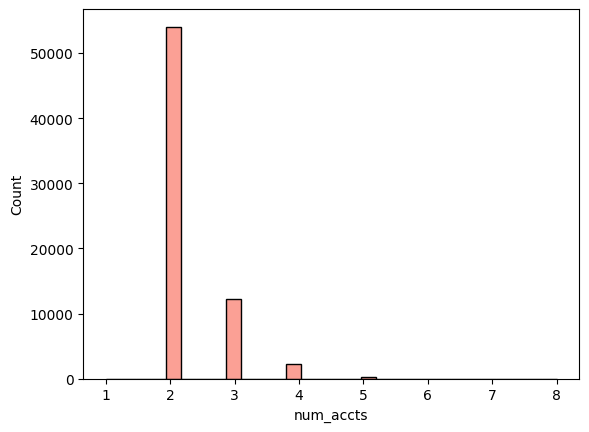

In [370]:
sns.histplot(demo_filtrado['num_accts'], bins=30, color="salmon")

In [371]:
frequency_llamadas = demo_filtrado['calls_6_mnth'].value_counts()
frequency_llamadas

calls_6_mnth
6.0    13818
1.0    10741
2.0     9944
3.0     8492
0.0     7585
4.0     6935
5.0     6484
7.0     4768
Name: count, dtype: int64

<Axes: xlabel='calls_6_mnth', ylabel='Count'>

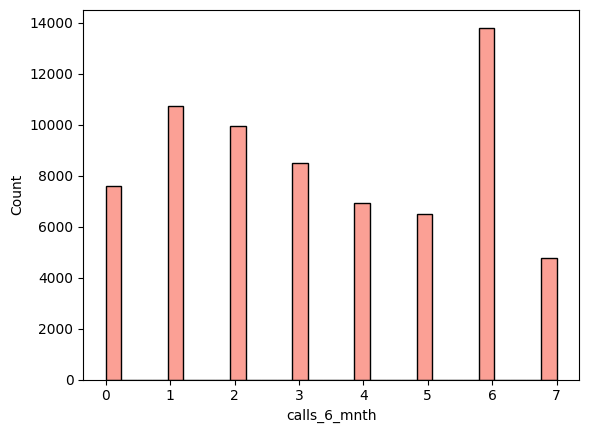

In [372]:
sns.histplot(demo_filtrado['calls_6_mnth'], color="salmon")

In [373]:
frequency_entradas = demo_filtrado['logons_6_mnth'].value_counts()
frequency_entradas

logons_6_mnth
9.0    12133
3.0     9973
4.0     9939
7.0     9624
5.0     9008
6.0     7667
8.0     4737
2.0     2861
1.0     2825
Name: count, dtype: int64

<Axes: xlabel='logons_6_mnth', ylabel='Count'>

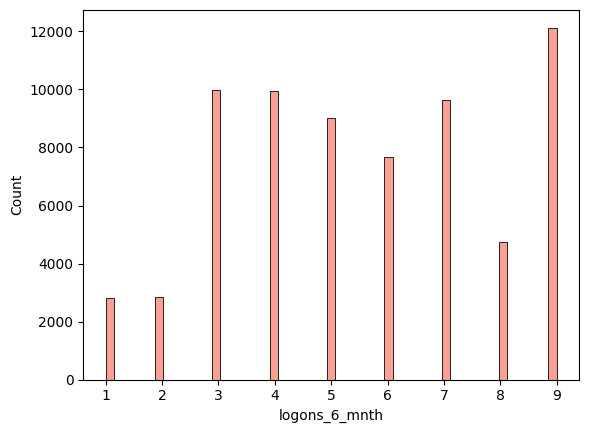

In [374]:
sns.histplot(demo_filtrado['logons_6_mnth'], color="salmon")

In [375]:
frequency_años = demo_filtrado['clnt_tenure_yr'].value_counts()
frequency_años

clnt_tenure_yr
6.0     6876
5.0     6636
7.0     4864
15.0    4501
4.0     4409
8.0     3983
14.0    3610
12.0    3601
13.0    3572
9.0     3308
11.0    2894
10.0    2754
16.0    2664
21.0    2179
20.0    1531
22.0    1442
17.0    1349
23.0    1222
18.0    1184
19.0    1133
24.0     810
26.0     630
27.0     599
28.0     483
25.0     461
3.0      418
30.0     293
29.0     293
33.0     195
32.0     181
34.0     168
31.0     161
35.0     101
2.0       76
36.0      36
37.0      33
38.0      31
48.0      16
55.0       9
40.0       9
50.0       7
39.0       7
42.0       6
43.0       6
47.0       6
46.0       4
51.0       4
49.0       4
44.0       2
52.0       2
54.0       1
41.0       1
45.0       1
62.0       1
Name: count, dtype: int64

CON ESTO PODEMOS SABER CUANTOS AÑOS LLEVAN UNA GRAN PARTE DE NUESTROS CLIENTES, EN EL QUE SE PUEDE VER QUE SOBRESALEN 5 Y 6 AÑOS

<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

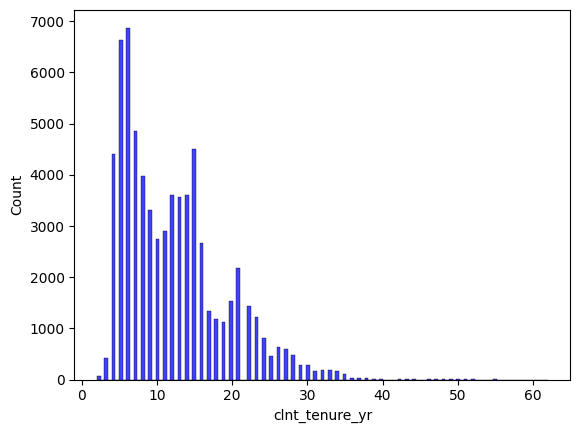

In [376]:
sns.histplot(demo_filtrado['clnt_tenure_yr'], color="blue")

#### -Lo que nos muestra este gráfico que hay más dinero en los clientes que tienen de 5 a 7 cuentas.

In [377]:
correlation = demo_filtrado['clnt_age'].corr(demo_filtrado['logons_6_mnth'], method='spearman')
correlation

np.float64(0.06945918370318671)

In [378]:
correlation2 = demo_filtrado['calls_6_mnth'].corr(demo_filtrado['logons_6_mnth'], method='spearman')
correlation2

np.float64(0.8301436005646146)

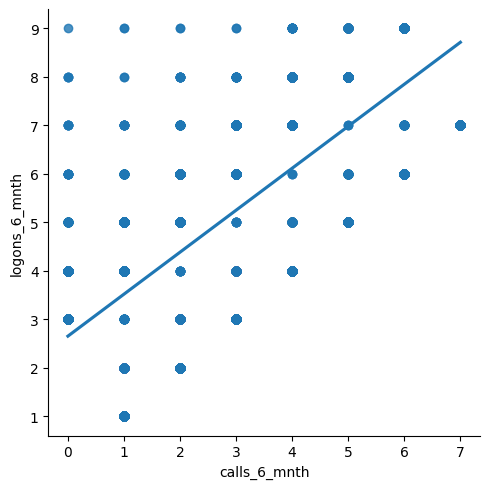

In [379]:
sns.lmplot(data=demo_filtrado,
            x='calls_6_mnth',
            y='logons_6_mnth')

In [380]:
correlation = demo_filtrado['clnt_age'].corr(demo_filtrado['bal'], method= 'spearman')
correlation

np.float64(0.3234754725681508)

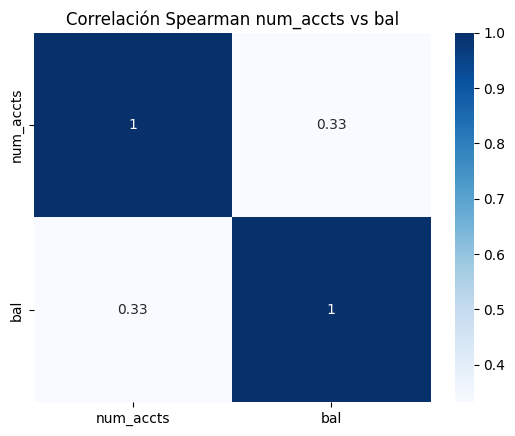

In [381]:
corr = demo_filtrado[['num_accts','bal']].corr(method='spearman')

sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlación Spearman num_accts vs bal")
plt.show()


In [382]:
correlation5 = demo_filtrado['clnt_tenure_yr'].corr(demo_filtrado['bal'], method='spearman')
correlation5

np.float64(0.26608372289098065)

In [383]:
correlation6 = demo_filtrado['clnt_age'].corr(demo_filtrado['num_accts'], method='spearman')
correlation6

np.float64(-0.028721715866273045)

C:\Users\CeX-Laguna\AppData\Local\Temp\ipykernel_20988\224758470.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=demo_filtrado, x='gendr', y='num_accts', palette="coolwarm")


<Axes: xlabel='gendr', ylabel='num_accts'>

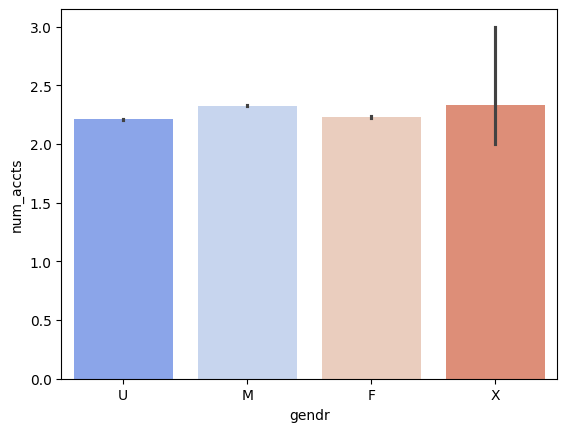

In [384]:
sns.barplot(data=demo_filtrado, x='gendr', y='num_accts', palette="coolwarm")

In [385]:
correlation7 = demo_filtrado['clnt_age'].corr(demo_filtrado['clnt_tenure_yr'], method='spearman')
correlation7

np.float64(0.2907774365775862)

### SUBIDA DE LOS OTROS ARCHIVOS Y UNIÓN

In [386]:
df1 = pd.read_csv('CSV/df_final_experiment_clients.txt')
df1

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


#### TRATAMIENTO DEL CSV PARA SABER VALORES NULOS Y COMO TRATARLOS

In [387]:
df1.isnull().sum()

client_id        0
Variation    20109
dtype: int64

In [388]:
frequency_df1 = df1['Variation'].value_counts()
frequency_df1

Variation
Test       26968
Control    23532
Name: count, dtype: int64

In [389]:
df1_filtrado = df1[df1['Variation'].isin(['Control', 'Test'])]
df1_filtrado

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


#### MERGE ENTRE DEMO (NUESTRO ORIGINAL - Y EL CSV TEST/CONTROL)

In [390]:
demo_unido = pd.merge(df1_filtrado, demo, on='client_id', how='inner')
demo_unido

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.9,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
50495,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0
50496,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
50497,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0
50498,5230357,Test,23.0,278.0,30.5,M,2.0,61349.7,0.0,3.0


### Que cliente promedio tenemos?

In [391]:
demo_unido= demo_unido[demo_unido['clnt_age'].between(18, 100)]
demo_unido = demo_unido[demo_unido['bal'] > 0]

In [392]:
demo_unido[['clnt_age']].describe()

,clnt_age
count,50425.000000
mean,47.356490
std,15.492807
min,18.000000
25%,33.500000
50%,48.000000
75%,59.500000
max,96.000000


In [393]:
demo_unido[['calls_6_mnth']].describe()


,calls_6_mnth
count,50425.0
unique,7.0
top,6.0
freq,12220.0


In [394]:
demo_unido[['logons_6_mnth']].describe()

,logons_6_mnth
count,50425.0
unique,7.0
top,9.0
freq,12345.0


In [395]:
demo_unido[['clnt_tenure_yr']].describe()

,clnt_tenure_yr
count,50425.0
unique,53.0
top,6.0
freq,5062.0


In [396]:
demo_unido[['num_accts']].describe()

,num_accts
count,50425.0
unique,7.0
top,2.0
freq,39666.0


In [397]:
demo_unido[['bal']].mean()

bal    149654.453758
dtype: object

In [398]:
demo_unido[['bal']].median()

bal    65856.25
dtype: object

In [399]:
demo_unido

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.9,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
50495,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0
50496,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
50497,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0
50498,5230357,Test,23.0,278.0,30.5,M,2.0,61349.7,0.0,3.0


In [400]:
perfil_por_grupo = demo_unido.groupby('Variation')[
    ['clnt_age', 'bal', 'num_accts', 'clnt_tenure_yr', 'logons_6_mnth', 'calls_6_mnth']
].agg(['mean', 'median'])
perfil_por_grupo


clnt_age                   bal           num_accts         \
                mean median           mean    median      mean median   
Variation                                                               
Control    47.534216   48.5   150286.21309  66119.51  2.260065    2.0   
Test       47.201396   47.5  149103.145377  65524.19  2.250084    2.0   

          clnt_tenure_yr        logons_6_mnth        calls_6_mnth         
                    mean median          mean median         mean median  
Variation                                                                 
Control        12.092348   11.0      6.167716    6.0     3.130607    3.0  
Test            11.98845   11.0      6.103094    6.0     3.063208    3.0

In [401]:
age_median = demo_unido['clnt_age'].median()

In [402]:
age_median

np.float64(48.0)

In [403]:
cliente_objetivo = demo_unido[
    (demo_unido['logons_6_mnth'] > demo_unido['logons_6_mnth'].median()) &
    (demo_unido['clnt_age'] < age_median) &
    (demo_unido['bal'] > demo_unido['bal'].median())]

In [404]:
cliente_objetivo

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
10,438567,Test,15.0,186.0,38.0,M,2.0,89161.52,6.0,9.0
21,9987707,Test,28.0,341.0,46.5,M,3.0,88607.54,6.0,9.0
25,2317698,Test,15.0,184.0,42.5,F,2.0,116894.92,5.0,8.0
33,8766054,Test,12.0,153.0,26.0,M,2.0,76660.36,4.0,7.0
36,1242238,Control,11.0,139.0,25.0,M,3.0,72557.7,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...
50428,3667184,Test,14.0,179.0,44.0,F,2.0,76827.15,6.0,9.0
50432,2856801,Test,15.0,183.0,33.0,M,2.0,115738.55,6.0,9.0
50441,7511753,Test,14.0,172.0,42.5,F,2.0,256153.18,6.0,9.0
50481,5931031,Test,11.0,142.0,30.5,M,3.0,66331.7,5.0,8.0


In [405]:
comparacion = pd.DataFrame({
    'Promedio general': demo_unido[['clnt_age', 'bal', 'num_accts', 'clnt_tenure_yr', 'logons_6_mnth', 'calls_6_mnth']].mean(),
    'Cliente objetivo': cliente_objetivo[['clnt_age', 'bal', 'num_accts', 'clnt_tenure_yr', 'logons_6_mnth', 'calls_6_mnth']].mean()
})
comparacion


,Promedio general,Cliente objetivo
clnt_age,47.35649,35.698231
bal,149654.453758,205719.536578
num_accts,2.254735,2.644873
clnt_tenure_yr,12.036867,11.757154
logons_6_mnth,6.133208,8.415342
calls_6_mnth,3.094616,5.394078


#### HEMOS CONVERTIDO NUESTROS DOS DATAS EN FLOAT TODAS LAS COLUMNAS QUE NOS INTERESABAN, Y HEMOS RELLENADO SUS VALORES NULOS CON LA MEDIANA DE CADA RESPECTIVA COLUMNA.

In [406]:
demo_filtrado = demo_filtrado.replace("Unknown", np.nan)

In [407]:
numerical_cols = ["clnt_age", "bal", "calls_6_mnth", "logons_6_mnth", "num_accts", "clnt_tenure_yr"]

for col in numerical_cols:
    demo_filtrado[col] = pd.to_numeric(demo_filtrado[col], errors="coerce")


In [408]:
demo_filtrado = demo_filtrado.apply(lambda col: col.fillna(col.median()) if col.dtype != 'object' else col)

In [409]:
numerical_cols = ["clnt_age", "bal", "calls_6_mnth", "logons_6_mnth", "num_accts", "clnt_tenure_yr", "clnt_tenure_mnth"]

for col in numerical_cols:
    demo_unido[col] = pd.to_numeric(demo_unido[col], errors="coerce")

In [410]:
demo_unido = demo_unido.apply(lambda col: col.fillna(col.median()) if col.dtype != 'object' else col)

In [411]:
df2 = pd.read_csv('CSV/df_final_web_data_pt_1.txt')

In [412]:
df3 = pd.read_csv('CSV/df_final_web_data_pt_2.txt')

In [413]:
df_web = pd.concat([df2, df3], axis=0)
df_web

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [414]:
total_clientes = df_web['client_id'].nunique()

completados = df_web[df_web['process_step'] == 'confirm']['client_id'].nunique()

tasa_total = completados / total_clientes * 100
print(f"Tasa de finalización total: {tasa_total:.2f}%")


Tasa de finalización total: 67.53%


In [415]:
grupo_de_control = pd.merge(df_web, df1_filtrado, on= 'client_id', how = 'inner')

In [416]:
# Clientes únicos por grupo
clientes_por_grupo = grupo_de_control.groupby('Variation')['client_id'].nunique()

# Clientes completados por grupo
completados_por_grupo = (
    grupo_de_control[grupo_de_control['process_step'] == 'confirm']
    .groupby('Variation')['client_id']
    .nunique()
)

# Tasa de finalización por grupo (%)
tasa_por_grupo = (completados_por_grupo / clientes_por_grupo * 100).reset_index()
tasa_por_grupo.columns = ['Variation', 'completion_rate_%']
tasa_por_grupo


,Variation,completion_rate_%
0,Control,65.587285
1,Test,69.293236


In [417]:
grupo_de_control

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
321304,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
321305,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
321306,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
321307,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


In [418]:
grupo_de_control['process_step'].value_counts()


process_step
start      104082
step_1      68436
step_2      56875
step_3      48689
confirm     43227
Name: count, dtype: int64

In [419]:
muestra = grupo_de_control.sort_values(by=['client_id', 'date_time'])
muestra

,client_id,visitor_id,visit_id,process_step,date_time,Variation
70803,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,Test
70802,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,Test
70801,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,Test
70800,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,Test
70799,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test
...,...,...,...,...,...,...
276145,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,Test
276144,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,Test
276143,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,Test
244975,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,Test


In [420]:
muestra.groupby('client_id')['process_step'].nunique().sort_values()


client_id
7694163    1
1202106    1
7696446    1
1198732    1
1197861    1
          ..
3572       5
3232       5
9999729    5
647        5
555        5
Name: process_step, Length: 50500, dtype: int64

In [421]:
# Define el orden correcto de los pasos
orden_pasos = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Crea una columna numérica con el orden
muestra['step_order'] = muestra['process_step'].apply(lambda x: orden_pasos.index(x))

# Ordena por cliente y por paso
muestra = muestra.sort_values(by=['client_id', 'step_order', 'date_time'])

In [422]:
muestra['date_time'] = pd.to_datetime(muestra['date_time'])


In [423]:
muestra['date'] = muestra['date_time'].dt.date   
muestra['time'] = muestra['date_time'].dt.time 
muestra

,client_id,visitor_id,visit_id,process_step,date_time,Variation,step_order,date,time
70803,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,Test,0,2017-04-15,12:57:56
70802,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,Test,1,2017-04-15,12:58:03
70801,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,Test,2,2017-04-15,12:58:35
70800,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,Test,3,2017-04-15,13:00:14
70799,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test,4,2017-04-15,13:00:34
...,...,...,...,...,...,...,...,...,...
276145,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,Test,2,2017-05-08,16:08:40
276144,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,Test,3,2017-05-08,16:09:19
276143,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,Test,4,2017-05-08,16:09:40
244975,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,Test,0,2017-05-16,16:46:03


In [424]:
muestra['tiempo_entre_pasos'] = muestra.groupby('client_id')['date_time'].diff()
muestra[['client_id', 'process_step', 'tiempo_entre_pasos']].head(10)
tiempo_promedio = muestra.groupby('process_step')['tiempo_entre_pasos'].mean()
tiempo_promedio


process_step
confirm     1 days 01:13:54.411902879
start       3 days 15:18:46.831185423
step_1    -1 days +16:32:52.018799415
step_2    -1 days +19:00:23.245563432
step_3    -1 days +23:22:18.622636080
Name: tiempo_entre_pasos, dtype: timedelta64[ns]

In [425]:
print(muestra.columns)

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'Variation', 'step_order', 'date', 'time', 'tiempo_entre_pasos'],
      dtype='object')


In [476]:
tiempos = muestra.groupby(['client_id', 'Variation'])['date_time'].agg(['min', 'max']).reset_index()
tiempos['tiempo_total'] = tiempos['max'] - tiempos['min']
tiempos



,client_id,Variation,min,max,tiempo_total
0,555,Test,2017-04-15 12:57:56,2017-04-15 13:00:34,0 days 00:02:38
1,647,Test,2017-04-12 15:41:28,2017-04-12 15:47:45,0 days 00:06:17
2,934,Test,2017-04-18 02:36:30,2017-04-18 02:38:52,0 days 00:02:22
3,1028,Control,2017-04-08 18:51:28,2017-04-08 19:00:26,0 days 00:08:58
4,1104,Control,2017-06-12 07:49:18,2017-06-20 22:31:33,8 days 14:42:15
...,...,...,...,...,...
50495,9999150,Test,2017-05-29 16:55:12,2017-05-29 16:55:30,0 days 00:00:18
50496,9999400,Test,2017-04-20 05:21:28,2017-04-20 05:23:27,0 days 00:01:59
50497,9999626,Test,2017-05-14 09:07:51,2017-05-14 09:07:59,0 days 00:00:08
50498,9999729,Test,2017-04-05 13:40:49,2017-05-08 16:09:40,33 days 02:28:51


In [477]:
tiempos['duration_minutes'] = tiempos['tiempo_total'].dt.total_seconds() / 60


In [478]:
tiempos = tiempos.groupby('Variation')['duration_minutes'].mean().round(2)
tiempos


Variation
Control    7168.29
Test       6668.47
Name: duration_minutes, dtype: float64

In [479]:
grupo_control = tiempos['Control']
grupo_test = tiempos['Test']

In [480]:
tiempo_medio_control = grupo_control.mean()
tiempo_medio_test = grupo_test.mean()

In [481]:
tiempo_medio_control, tiempo_medio_test


(np.float64(7168.29), np.float64(6668.47))

In [482]:
diferencia = tiempo_medio_control - tiempo_medio_test
diferencia

np.float64(499.8199999999997)

In [483]:
horas_diferencia = 499.8199999999997 / 60
horas_diferencia

8.330333333333328

CON ESTO SE PUEDE CONCLUIR QUE EL TEST ES MUCHO MAS EFICIENTE QUE EL CONTROL CON UNA DIFERENCIA DE 8 HORAS

In [484]:
muestra['date_time'] = pd.to_datetime(muestra['date_time'])

In [485]:
muestra_control = muestra[muestra['Variation'] == 'Control'].copy()
muestra_test = muestra[muestra['Variation'] == 'Test'].copy()

In [491]:
def calcular_tiempos_por_paso_control(muestra_control):
    # trabajar sobre copia para evitar warnings
    muestra_control = muestra_control.copy()
    
    # asegurarse de que date_time es datetime
    muestra_control['date_time'] = pd.to_datetime(muestra_control['date_time'])
    
    # ordenar por cliente y fecha
    muestra_control = muestra_control.sort_values(['client_id', 'date_time'])
    
    # calcular diferencia de tiempo entre pasos consecutivos
    muestra_control['tiempo_entre_pasos'] = muestra_control.groupby('client_id')['date_time'].diff()
    
    # eliminar filas sin diferencia
    muestra_control = muestra_control.dropna(subset=['tiempo_entre_pasos'])
    
    # convertir a minutos
    muestra_control['tiempo_entre_pasos_min'] = muestra_control['tiempo_entre_pasos'].dt.total_seconds() / 60
    
    # agrupar por paso y calcular estadísticas
    resumen_control = muestra_control.groupby('process_step')['tiempo_entre_pasos_min'].agg(['mean','median','count']).round(2)
    
    return resumen_control



In [493]:
resumen_control = calcular_tiempos_por_paso_control(muestra_control)
print(resumen_control)


                 mean  median  count
process_step                        
confirm       1101.27    1.27  17467
start         6117.74    1.90  24242
step_1          30.65    0.30  29576
step_2           0.66    0.33  25878
step_3           9.60    1.10  22767


In [494]:
def calcular_tiempos_por_paso_test(muestra_test):
    # trabajar sobre copia para evitar warnings
    muestra_test = muestra_test.copy()
    
    # asegurarse de que date_time es datetime
    muestra_test['date_time'] = pd.to_datetime(muestra_test['date_time'])
    
    # ordenar por cliente y fecha
    muestra_test = muestra_test.sort_values(['client_id', 'date_time'])
    
    # calcular diferencia de tiempo entre pasos consecutivos
    muestra_test['tiempo_entre_pasos'] = muestra_test.groupby('client_id')['date_time'].diff()
    
    # eliminar filas sin diferencia
    muestra_test = muestra_test.dropna(subset=['tiempo_entre_pasos'])
    
    # convertir a minutos
    muestra_test['tiempo_entre_pasos_min'] = muestra_test['tiempo_entre_pasos'].dt.total_seconds() / 60
    
    # agrupar por paso y calcular estadísticas
    resumen_test = muestra_test.groupby('process_step')['tiempo_entre_pasos_min'].agg(['mean','median','count']).round(2)
    
    return resumen_test

In [495]:
resumen_test = calcular_tiempos_por_paso_test(muestra_test)
print(resumen_test)

                 mean  median  count
process_step                        
confirm       1740.54    1.12  25496
start         4495.83    1.47  29854
step_1          22.33    0.18  38679
step_2           1.85    0.42  30983
step_3          12.32    1.10  25867


In [496]:
comparacion['diferencia'] = comparacion['mean_test'] - comparacion['mean_control']


KeyError: 'mean_test'

In [444]:
# 1️⃣ Asegurarse de que la columna de fecha está en formato datetime
muestra_test['date_time'] = pd.to_datetime(muestra_test['date_time'])

# 2️⃣ Ordenar por cliente y por fecha
muestra_test = muestra_test.sort_values(['client_id', 'date_time'])

# 3️⃣ Calcular diferencia de tiempo entre pasos consecutivos del mismo usuario
muestra_test['tiempo_entre_pasos'] = muestra_test.groupby('client_id')['date_time'].diff()

# 4️⃣ Eliminar filas donde no se pueda calcular la diferencia (NaN)
muestra_test = muestra_test.dropna(subset=['tiempo_entre_pasos'])

# 5️⃣ Calcular tiempo promedio por paso
tiempo_promedio_test = muestra_test.groupby('process_step')['tiempo_entre_pasos'].mean()

# 6️⃣ Mostrar resultados
print(tiempo_promedio_test)


C:\Users\CeX-Laguna\AppData\Local\Temp\ipykernel_20988\1234927534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muestra_test['date_time'] = pd.to_datetime(muestra_test['date_time'])


process_step
confirm   1 days 05:00:32.677243489
start     3 days 02:55:49.876398472
step_1    0 days 00:22:19.895705680
step_2    0 days 00:01:51.146854726
step_3    0 days 00:12:18.964394788
Name: tiempo_entre_pasos, dtype: timedelta64[ns]


In [445]:
# 1️⃣ Asegurarse de que la columna de fecha está en formato datetime
muestra_control['date_time'] = pd.to_datetime(muestra_control['date_time'])

# 2️⃣ Ordenar por cliente y por fecha
muestra_control = muestra_control.sort_values(['client_id', 'date_time'])

# 3️⃣ Calcular diferencia de tiempo entre pasos consecutivos del mismo usuario
muestra_control['tiempo_entre_pasos'] = muestra_control.groupby('client_id')['date_time'].diff()

# 4️⃣ Eliminar filas donde no se pueda calcular la diferencia (NaN)
muestra_control = muestra_control.dropna(subset=['tiempo_entre_pasos'])

# 5️⃣ Calcular tiempo promedio por paso
tiempo_promedio_control = muestra_control.groupby('process_step')['tiempo_entre_pasos'].mean()

# 6️⃣ Mostrar resultados
print(tiempo_promedio_control)


C:\Users\CeX-Laguna\AppData\Local\Temp\ipykernel_20988\1525124867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muestra_control['date_time'] = pd.to_datetime(muestra_control['date_time'])


process_step
confirm   0 days 18:21:16.385755997
start     4 days 05:57:44.544592030
step_1    0 days 00:30:38.793920746
step_2    0 days 00:00:39.471404281
step_3    0 days 00:09:35.764835068
Name: tiempo_entre_pasos, dtype: timedelta64[ns]


In [447]:
# Calcular diferencia entre ambos
diferencia = tiempo_promedio_test - tiempo_promedio_control

# Mostrar resultado ordenado
print(diferencia)


process_step
confirm     0 days 10:39:16.291487492
start     -2 days +20:58:05.331806442
step_1    -1 days +23:51:41.101784934
step_2      0 days 00:01:11.675450445
step_3      0 days 00:02:43.199559720
Name: tiempo_entre_pasos, dtype: timedelta64[ns]


In [441]:
muestra_control['tiempo_entre_pasos_control'] = muestra_control.groupby('client_id')['date_time'].diff()
muestra_control[['client_id', 'process_step', 'tiempo_entre_pasos']].head(10)
tiempo_promedio_control = muestra_control.groupby('process_step')['tiempo_entre_pasos'].mean()
tiempo_promedio_control

C:\Users\CeX-Laguna\AppData\Local\Temp\ipykernel_20988\751694476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muestra_control['tiempo_entre_pasos_control'] = muestra_control.groupby('client_id')['date_time'].diff()


process_step
confirm     0 days 19:53:58.162630946
start       4 days 06:07:29.787823716
step_1    -1 days +14:48:48.559125617
step_2    -1 days +16:36:20.594102644
step_3    -1 days +23:32:50.633210397
Name: tiempo_entre_pasos, dtype: timedelta64[ns]

In [442]:
muestra_test['tiempo_entre_pasos_test'] = muestra_test.groupby('client_id')['date_time'].diff()
muestra_test[['client_id', 'process_step', 'tiempo_entre_pasos']].head(10)
tiempo_promedio_test = muestra_test.groupby('process_step')['tiempo_entre_pasos'].mean()
tiempo_promedio_test

C:\Users\CeX-Laguna\AppData\Local\Temp\ipykernel_20988\387894511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muestra_test['tiempo_entre_pasos_test'] = muestra_test.groupby('client_id')['date_time'].diff()


process_step
confirm     1 days 04:52:50.033295467
start       3 days 03:16:37.342909884
step_1    -1 days +17:52:26.808717896
step_2    -1 days +21:00:41.774636068
step_3    -1 days +23:13:02.242269636
Name: tiempo_entre_pasos, dtype: timedelta64[ns]

In [443]:
diferencia = tiempo_promedio_control - tiempo_promedio_test
diferencia

process_step
confirm   -1 days +15:01:08.129335479
start       1 days 02:50:52.444913832
step_1    -1 days +20:56:21.750407721
step_2    -1 days +19:35:38.819466576
step_3      0 days 00:19:48.390940761
Name: tiempo_entre_pasos, dtype: timedelta64[ns]

In [ ]:
# Asegúrate de que la columna date_time sea tipo datetime
df['date_time'] = pd.to_datetime(df['date_time'])

# Ordenar por usuario y fecha
df = df.sort_values(['user_id', 'date_time'])

# Calcular el siguiente paso y su hora para cada usuario
df['next_step'] = df.groupby('user_id')['process_step'].shift(-1)
df['next_time'] = df.groupby('user_id')['date_time'].shift(-1)

# Calcular el tiempo entre un paso y el siguiente
df['time_in_step'] = df['next_time'] - df['date_time']

# Limpiar los datos: eliminar el último paso (no tiene siguiente)
df_clean = df[df['time_in_step'].notna()].copy()

# Convertir el tiempo a segundos para facilitar cálculos
df_clean['time_in_step_sec'] = df_clean['time_in_step'].dt.total_seconds()

# Calcular el tiempo medio por paso
tiempo_medio = df_clean.groupby('process_step')['time_in_step_sec'].mean().reset_index()

# Convertimos los segundos a formato más legible (minutos)
tiempo_medio['time_in_minutes'] = tiempo_medio['time_in_step_sec'] / 60

print("⏱️ Tiempo medio por paso:")
print(tiempo_medio)
